In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
import loompy
import numpy as np
import cytograph.plotting as cgplot
import topo

In [2]:
import shoji
db = shoji.connect()

In [45]:
xy = ws.TSNE[:]
cgplot.scatterc(xy, c=ws.Clusters[:]) #, ws.Expression[:, ws.Gene == "PTPRC"].T[0], s=10)

AttributeError: 'WorkspaceManager' object has no attribute 'TSNE'

In [42]:
tg = topo.ml.TopOGraph()
data = ws.Expression[:, ws.SelectedFeatures == True]
tg.fit(data)

Building topological basis...


KeyboardInterrupt: 

In [ ]:
tg.

In [34]:
tgraph = tg.transform()

Building topological graph...
Topological graph extracted in = 0.077828 (sec)


  0%|          | 0/61 [00:00<?, ?it/s]

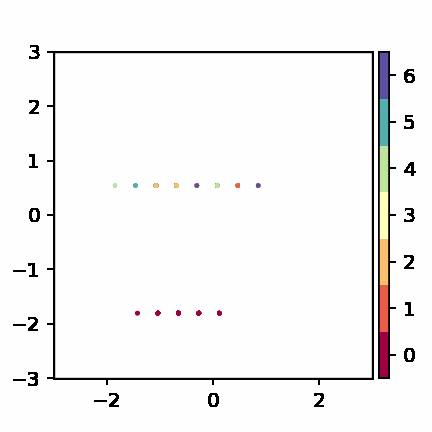

In [35]:
mde = tg.MDE()
xy = mde.embed(snapshot_every=5)
mde.play(savepath='gmb1.gif',
                 marker_size=5, 
                 color_by=ws.Clusters[:],
                 figsize_inches=(3,3),
                axis_limits=[-3, 3])

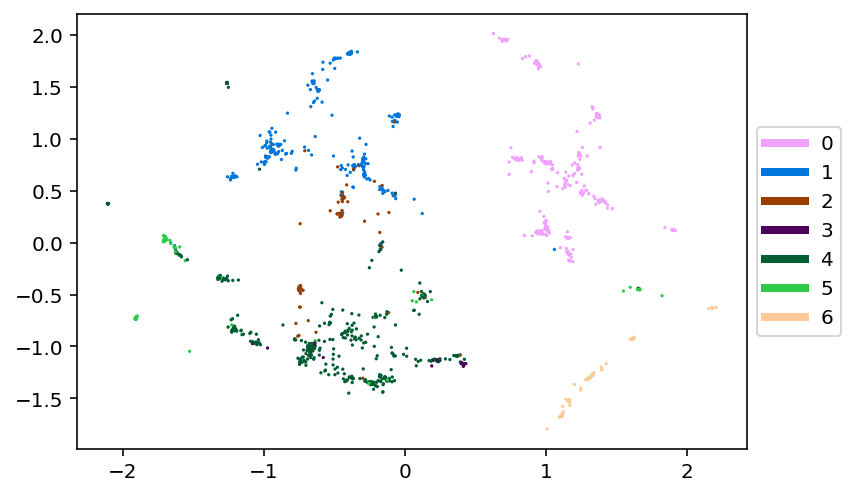

In [28]:
cgplot.scatterc(xy, c=ws.Clusters[:])

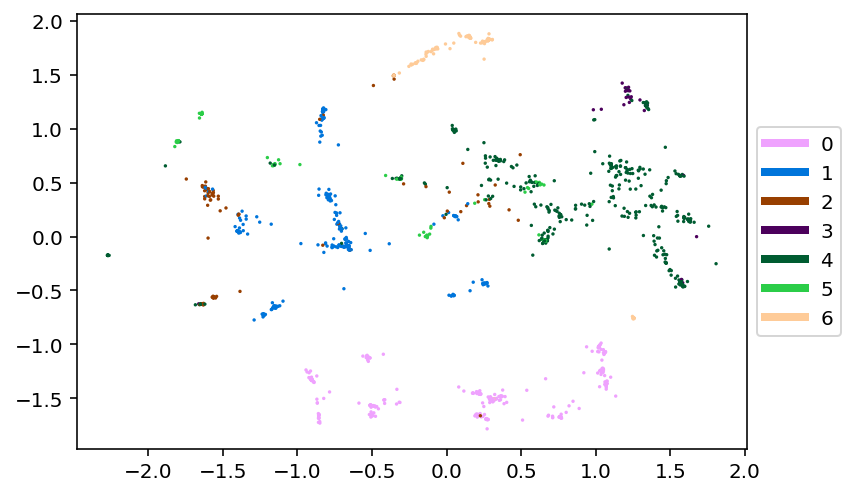

In [36]:
cgplot.scatterc(xy, c=ws.Clusters[:])

In [14]:
with loompy.connect("/Users/stelin/cytograph/mouse_adolescent/data/l5_all.loom") as ds:
    data = ds[ds.ra.Gene == "Slc30a7", :][0]
    clusters = ds.ca.ClusterName[:]
    total = ds.ca._Total[:]
print(data)
print(clusters)
print(total)

[0. 0. 0. ... 0. 0. 0.]
['ENT9' 'ENT9' 'ENT9' ... 'PSNP6' 'PSNP6' 'PSNP6']
[19065. 21617. 19565. ... 24402. 19264. 25031.]


In [17]:
data / total * np.median(total)

array([0., 0., 0., ..., 0., 0., 0.])

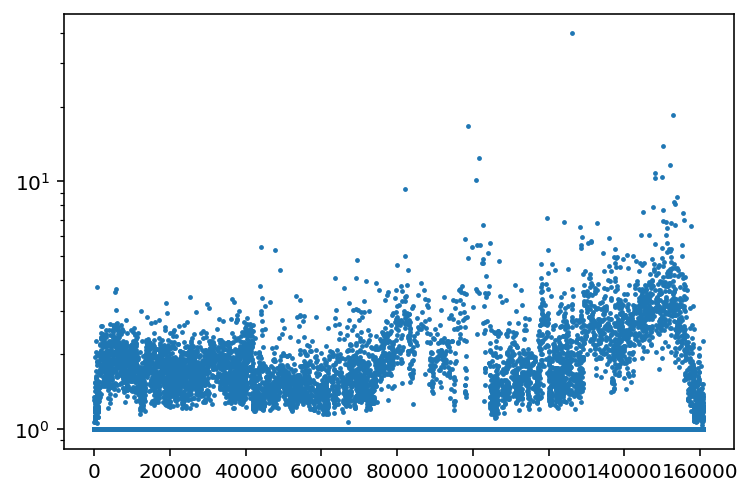

In [21]:
plt.scatter(np.arange(len(total)), data / total * np.median(total) + 1, s=2)
plt.yscale("log")